# Análise Exploratória do Dataset: diabetes-health-indicators-dataset

Base Desbalanceada

## Import de Bibliotecas e Pacote

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\Lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ucimlrepo import fetch_ucirepo
from warnings import filterwarnings
filterwarnings('ignore')

## Load dos Dados

In [3]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

data = cdc_diabetes_health_indicators.data.features
aux = cdc_diabetes_health_indicators.data.targets

data["Diabetes"] = aux["Diabetes_binary"]


### Mostrar 5 primeiras linhas com todas as colunas 

In [4]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


### Entendendo o Dataset

In [5]:
data.shape

(253680, 22)

In [6]:
data.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

### Corrigindo Dtype das colunas

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


### Limpeza dos Dados

In [10]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64

In [11]:
data.duplicated().sum()

24206

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(229474, 22)

### Organização das Colunas

In [14]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes'})

In [15]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [16]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [17]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

HighBP : HighBP
0    125214
1    104260
Name: count, dtype: int64

HighChol : HighChol
0    128129
1    101345
Name: count, dtype: int64

CholCheck : CholCheck
1    220176
0      9298
Name: count, dtype: int64

BMI : BMI
27    21514
26    17775
24    16497
28    14914
25    14793
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64

Smoker : Smoker
0    122585
1    106889
Name: count, dtype: int64

Stroke : Stroke
0    219190
1     10284
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0    205761
1     23713
Name: count, dtype: int64

PhysActivity : PhysActivity
1    168214
0     61260
Name: count, dtype: int64

Fruits : Fruits
1    140593
0     88881
Name: count, dtype: int64

Veggies : Veggies
1    182337
0     47137
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    215524
1     13950
Name: count, dtype: int64

AnyHealthcare : AnyHealthcare
1    217085
0     12389
Name: count, dtype: i

## Análise dos Dados

### Correlação dos Dados

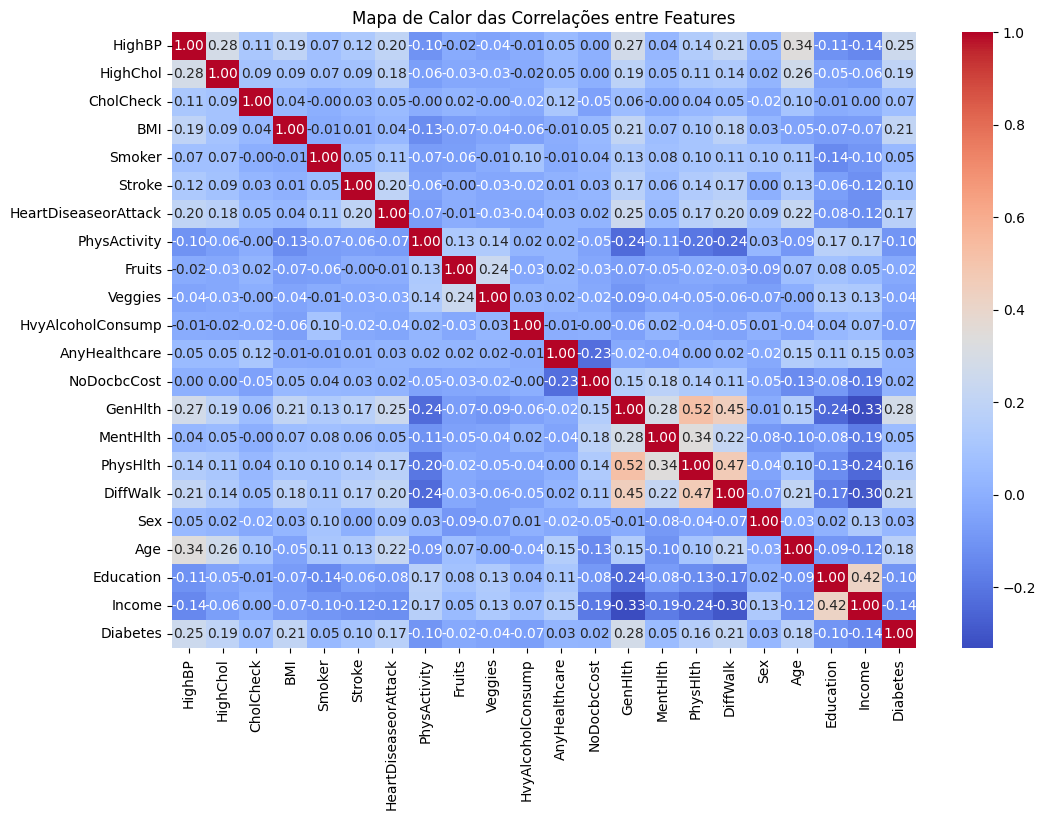

A maior correlação positiva é 0.5164759642743163 entre ('GenHlth', 'PhysHlth').
A maior correlação negativa é -0.331782491396322 entre ('GenHlth', 'Income').


In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações entre Features')
plt.show()

correlation_matrix = data.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)

max_corr = correlation_matrix.max().max()
max_corr_pair = correlation_matrix.stack().idxmax()

min_corr = correlation_matrix.min().min()
min_corr_pair = correlation_matrix.stack().idxmin()

print(f"A maior correlação positiva é {max_corr} entre {max_corr_pair}.")
print(f"A maior correlação negativa é {min_corr} entre {min_corr_pair}.")


OBSERVAÇÃO -> A correlação negativa entre GenHlth e Income indica que quanto maior a renda, mais baixo a saúde geral. Entretanto, isso se deve a maneira de como os dados estão disponibilizados no nosso Dataset. GenHlth é uma variável categórica ordinal, que varia de 1 a 5. Sendo 1 = Excelente e 5 = Péssima. Por esse motivo a correlação é negativa. Na realidade, os dados nos informam que quanto maior a renda, melhor a saúde geral. 

### Dados Separados por Sexo

In [19]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

HighBP                  16752
HighChol                16752
CholCheck               16752
BMI                     16752
Smoker                  16752
Stroke                  16752
HeartDiseaseorAttack    16752
PhysActivity            16752
Fruits                  16752
Veggies                 16752
HvyAlcoholConsump       16752
AnyHealthcare           16752
NoDocbcCost             16752
GenHlth                 16752
MentHlth                16752
PhysHlth                16752
DiffWalk                16752
Sex                     16752
Age                     16752
Education               16752
Income                  16752
Diabetes                16752
dtype: int64

### Frequência de diabetes em homens para diferentes idades

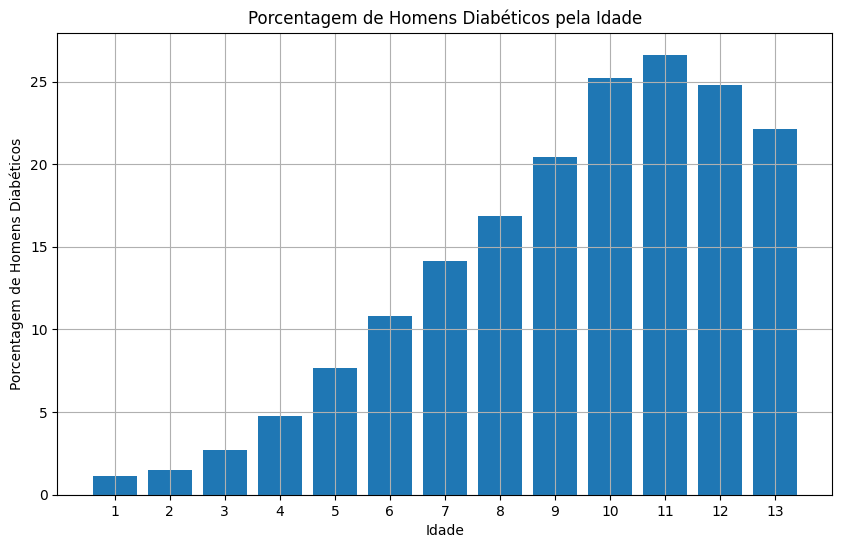

Percentual máximo de homens diabéticos é 26.63% na idade 11.


In [20]:

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Homens Diabéticos')
plt.title('Porcentagem de Homens Diabéticos pela Idade')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Percentual máximo de homens diabéticos é {:.2f}% na idade {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))
 

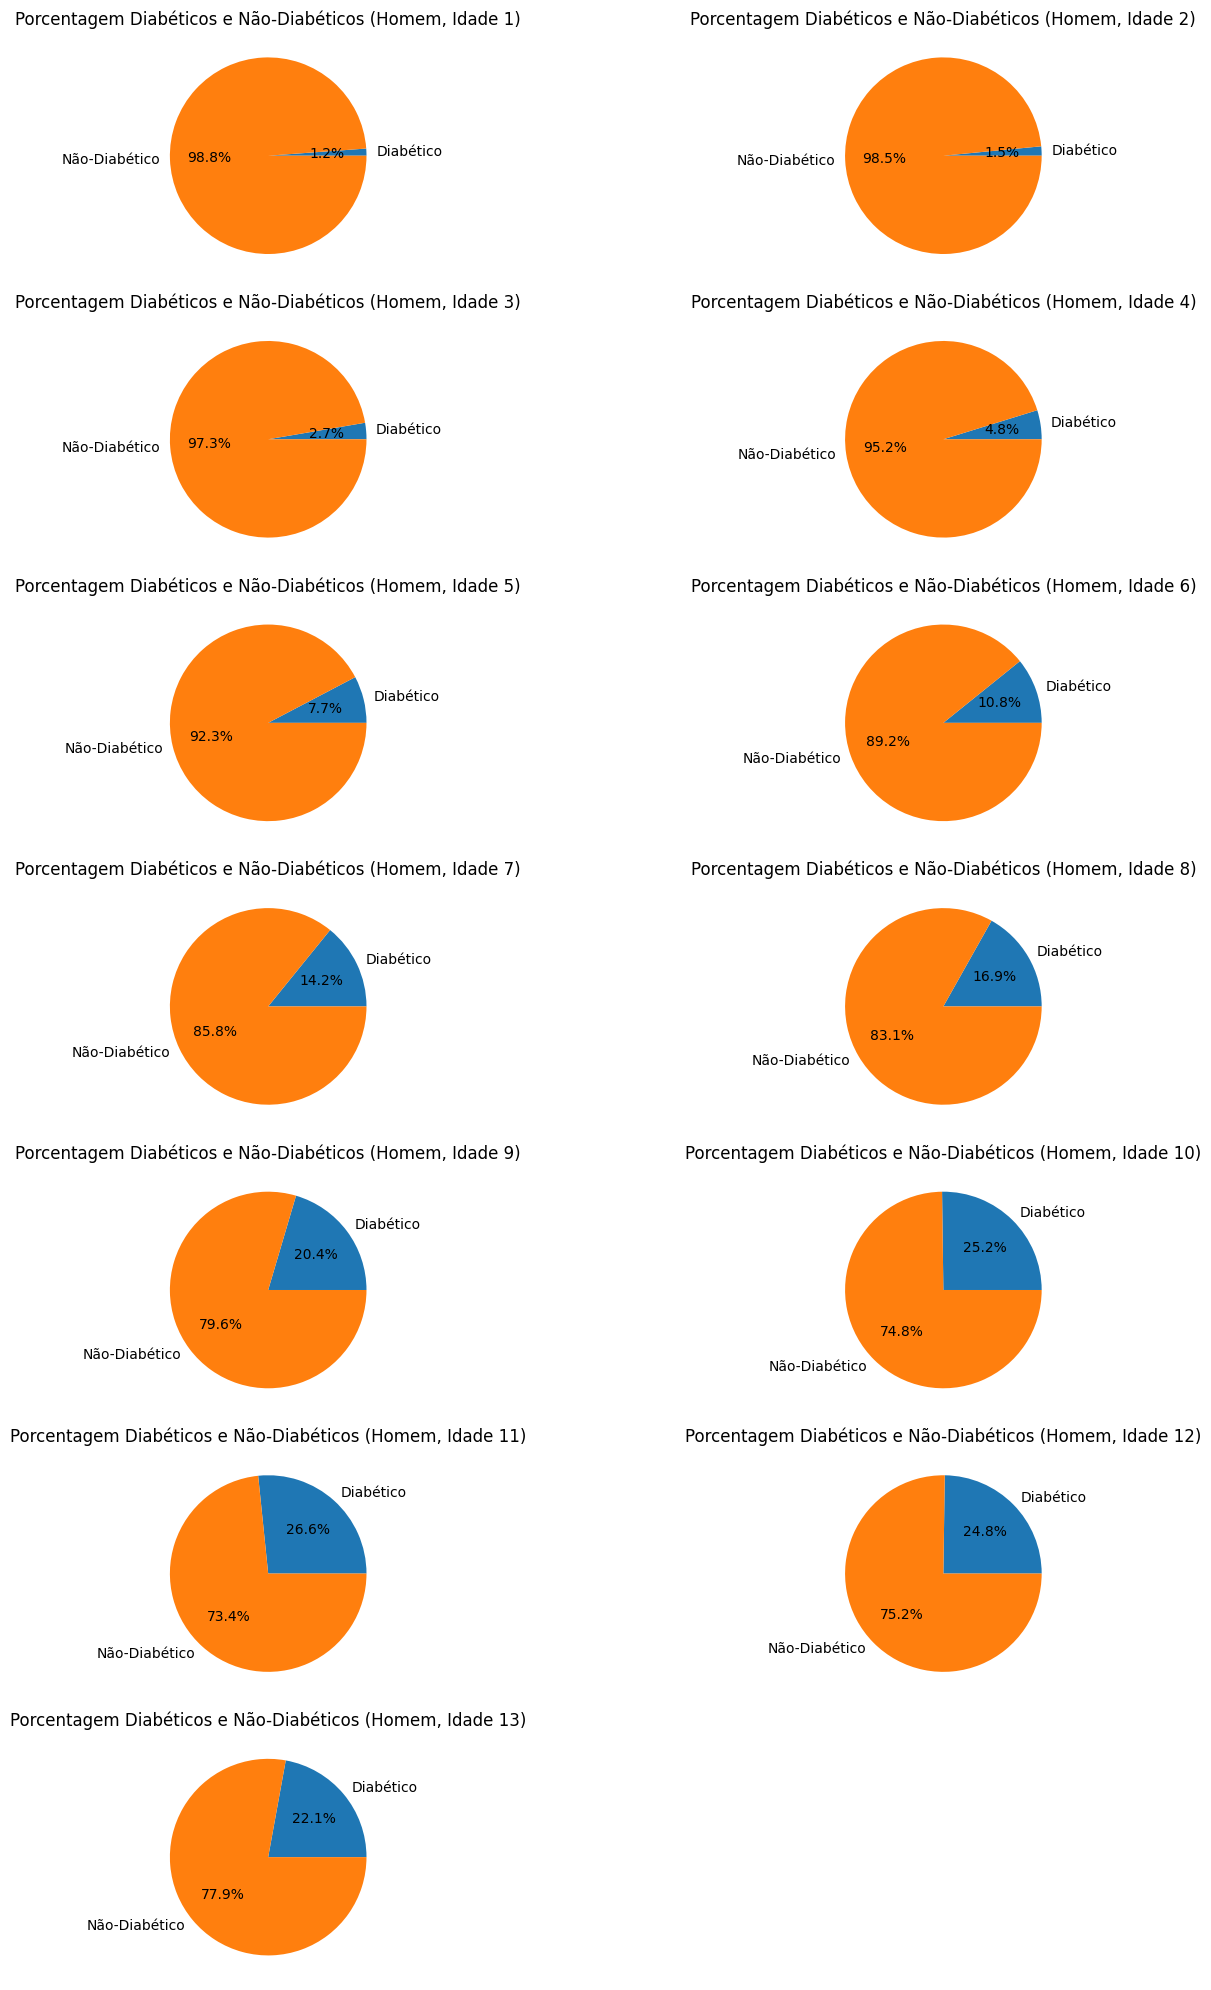

In [21]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
    plt.title(f'Porcentagem Diabéticos e Não-Diabéticos (Homem, Idade {age})')
plt.tight_layout()
plt.show()

### Frequência de diabetes em mulheres para diferentes idades

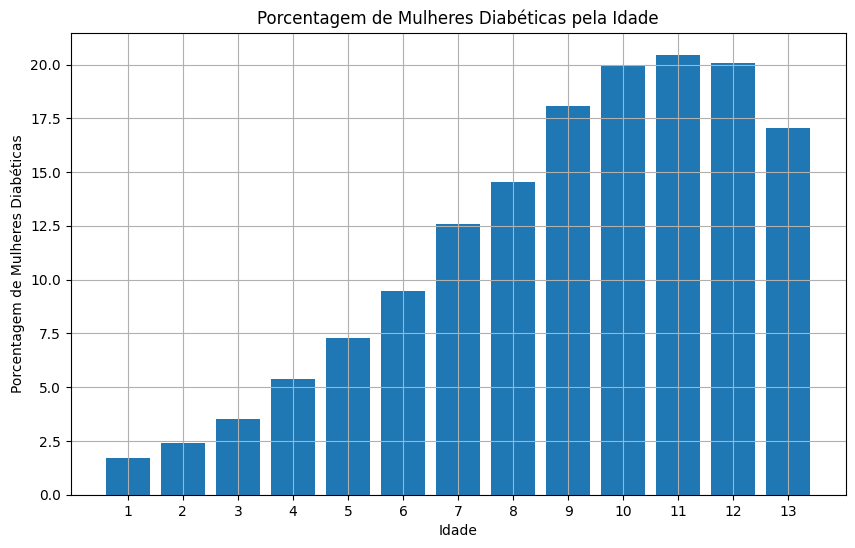

Percentual máximo de mulheres diabéticas é 20.46% na idade 11.


In [22]:
data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Idade')
plt.ylabel('Porcentagem de Mulheres Diabéticas')
plt.title('Porcentagem de Mulheres Diabéticas pela Idade')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Percentual máximo de mulheres diabéticas é {:.2f}% na idade {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))

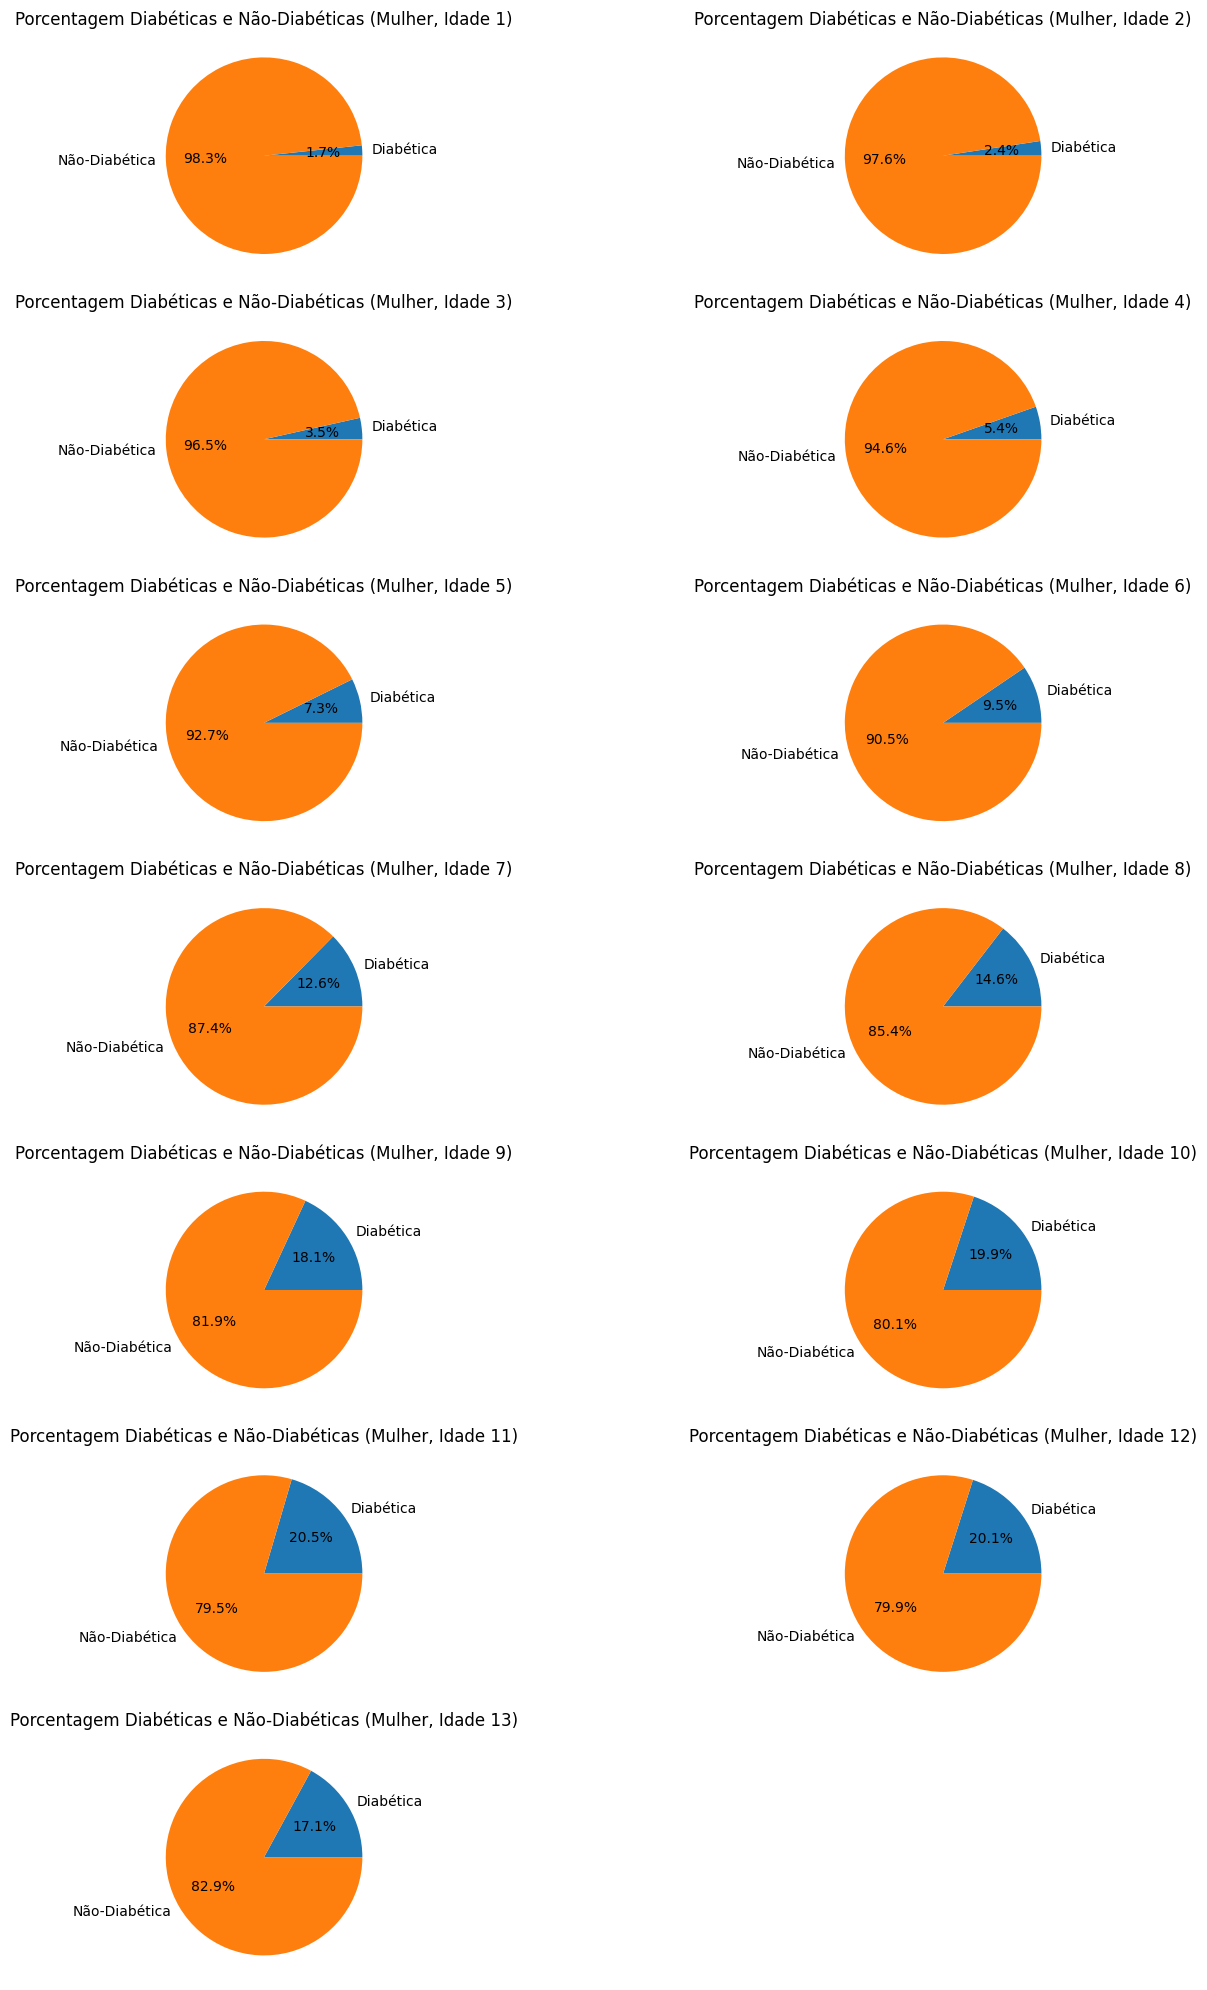

In [23]:
plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
    plt.title(f'Porcentagem Diabéticas e Não-Diabéticas (Mulher, Idade {age})')
plt.tight_layout()
plt.show()

### Relação IMC e Diabetes para Homens

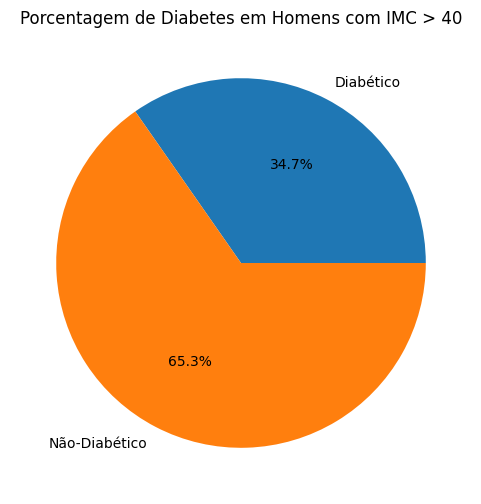

Porcentagem de Diabetes em Homens com IMC > 40: 34.7%


In [26]:

male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]


total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100


plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens com IMC > 40')
plt.show()

print(f"Porcentagem de Diabetes em Homens com IMC > 40: {percent_diabetic:.1f}%")

### Relação IMC e Diabetes para Mulheres

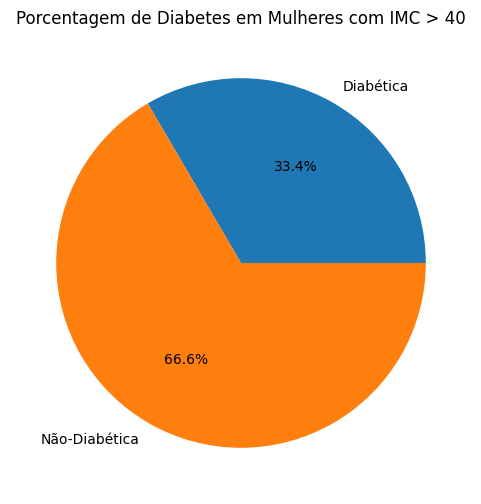

Porcentagem de Diabetes em Mulheres com IMC > 40 33.4%


In [27]:
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]


total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100


plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres com IMC > 40')
plt.show()

print(f"Porcentagem de Diabetes em Mulheres com IMC > 40 {percent_diabetic:.1f}%")

### Relação Renda e Diabetes para Homens e Mulheres

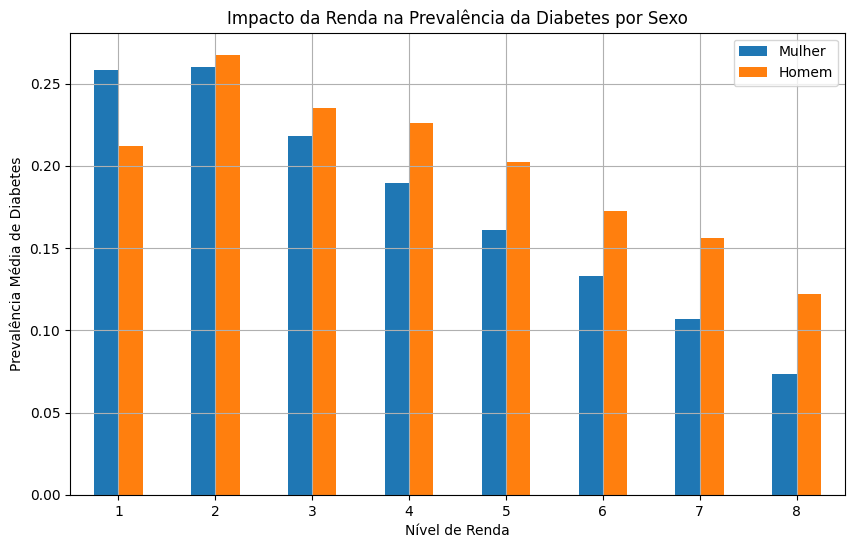

In [28]:
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nível de Renda')
plt.ylabel('Prevalência Média de Diabetes')
plt.title('Impacto da Renda na Prevalência da Diabetes por Sexo')
plt.xticks(rotation=0)
plt.legend(['Mulher', 'Homem'])
plt.grid(True)
plt.show()

### Relação Educação e Diabetes para Homens e Mulheres

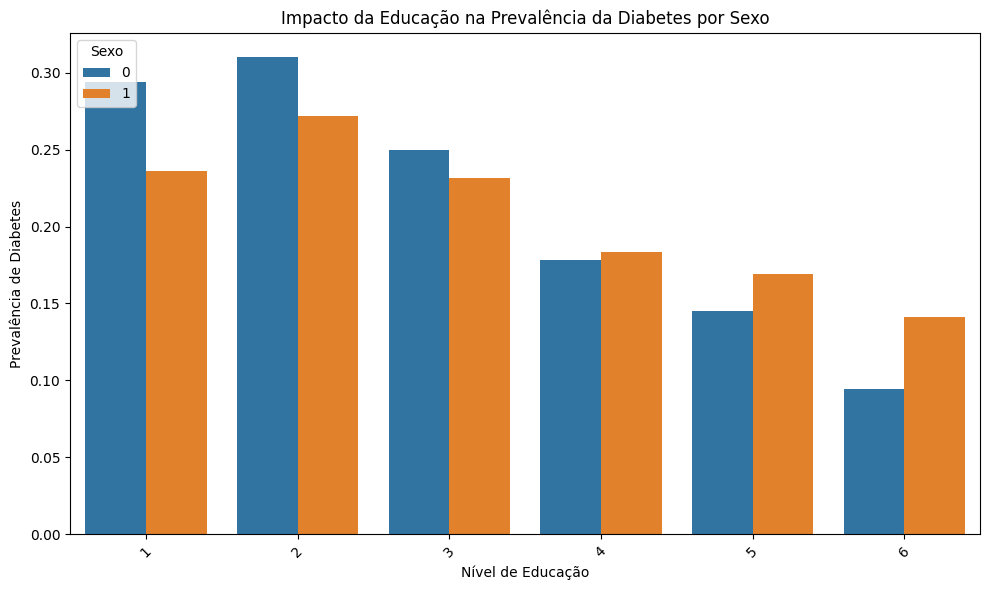

In [29]:
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Nível de Educação')
plt.ylabel('Prevalência de Diabetes')
plt.title('Impacto da Educação na Prevalência da Diabetes por Sexo')
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper left')
plt.tight_layout()
plt.show()

### O Impacto Percentual de Atividades Físicas em Diabéticos Para Homens e Mulheres

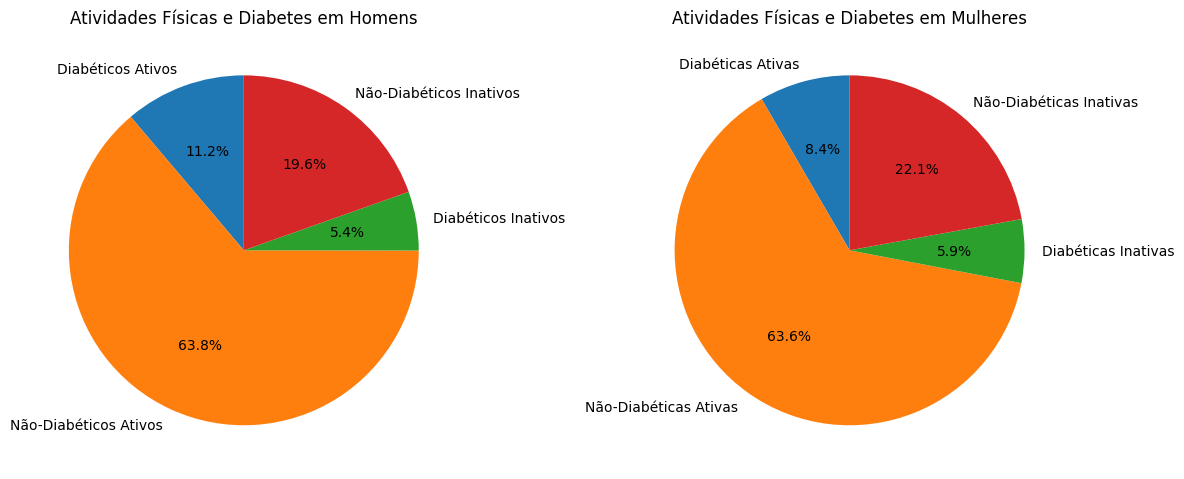

In [30]:
male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Diabéticos Ativos', 'Não-Diabéticos Ativos', 'Diabéticos Inativos', 'Não-Diabéticos Inativos'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Atividades Físicas e Diabetes em Homens')

axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Diabéticas Ativas', 'Não-Diabéticas Ativas', 'Diabéticas Inativas', 'Não-Diabéticas Inativas'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Atividades Físicas e Diabetes em Mulheres')

plt.tight_layout()
plt.show()

### O Impacto Percentual de Doenças Cardíacas em Diabéticos para Homens e Mulheres

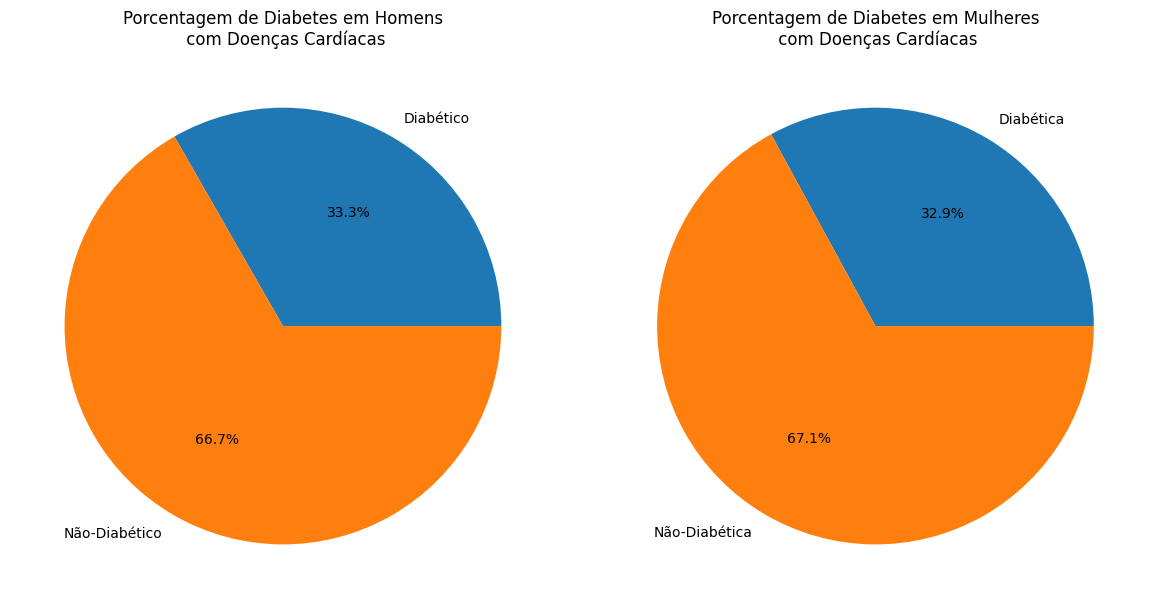

Porcentagem de Diabetes em Homens com Doenças Cardíacas: 33.3%
Porcentagem de Diabetes em Homens sem Doenças Cardíacas: 14.0%
Porcentagem de Diabetes em Mulheres com Doenças Cardíacas: 32.9%
Porcentagem de Diabetes em Mulheres sem Doenças Cardíacas: 12.6%


In [31]:
male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens\n com Doenças Cardíacas')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres\n com Doenças Cardíacas')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Diabetes em Homens com Doenças Cardíacas: {male_hd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Homens sem Doenças Cardíacas: {male_nohd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres com Doenças Cardíacas: {female_hd_diabetic_percent:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres sem Doenças Cardíacas: {female_nohd_diabetic_percent:.1f}%")


### O Impacto Percentual do AVC em Diabéticos para Homens e Mulheres

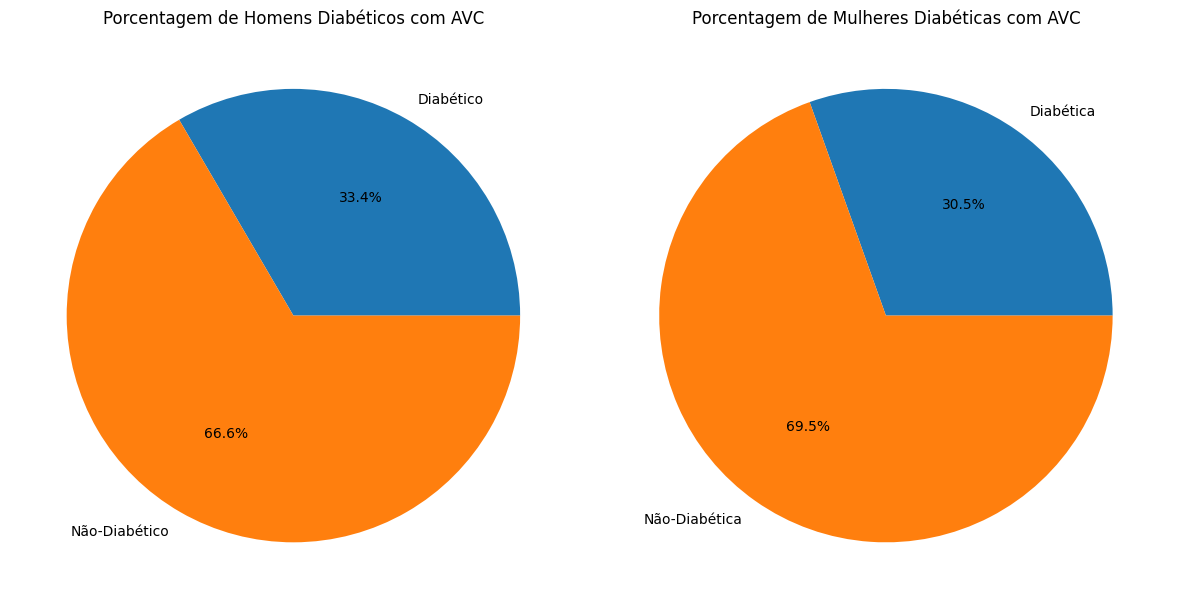

Porcentagem de Homens Diabéticos com AVC: 33.4%
Porcentagem de Mulheres Diabéticas com AVC: 30.5%


In [32]:

male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100


total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Homens Diabéticos com AVC')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Mulheres Diabéticas com AVC')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Homens Diabéticos com AVC: {percent_diabetic_male_stroke:.1f}%")
print(f"Porcentagem de Mulheres Diabéticas com AVC: {percent_diabetic_female_stroke:.1f}%")

### O Impacto Percentual da Hipertensão em Diabéticos para Homens e Mulheres

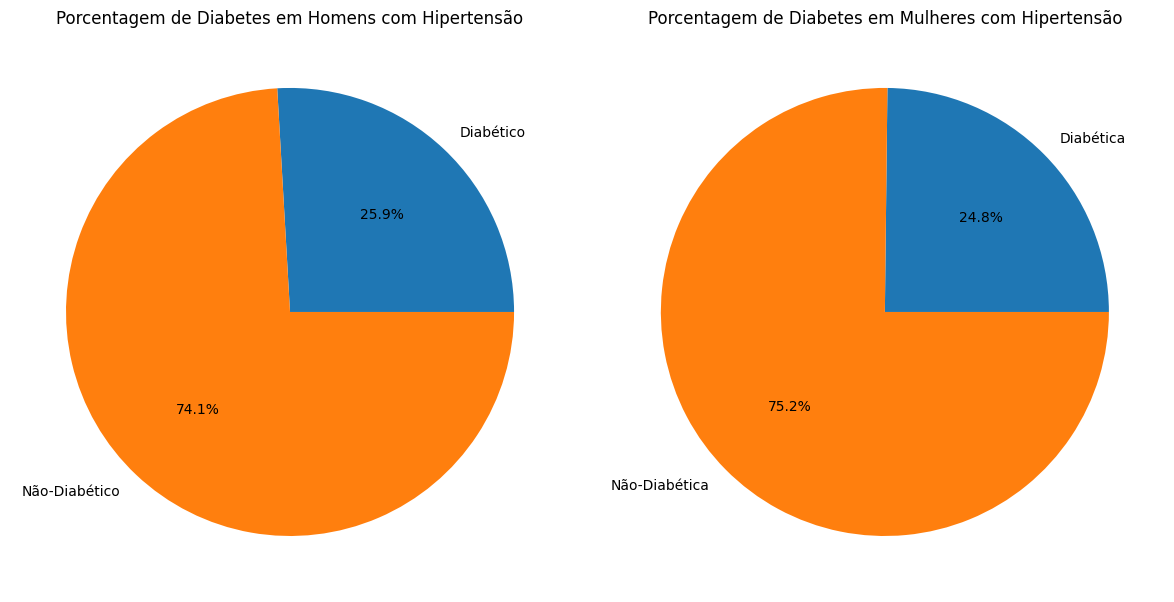

Porcentagem de Diabetes em Homens com Hipertensão: 25.9%
Porcentagem de Diabetes em Mulheres com Hipertensão: 24.8%


In [33]:
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Homens com Hipertensão')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Diabetes em Mulheres com Hipertensão')

plt.tight_layout()
plt.show()

print(f"Porcentagem de Diabetes em Homens com Hipertensão: {male_percent_diabetic:.1f}%")
print(f"Porcentagem de Diabetes em Mulheres com Hipertensão: {female_percent_diabetic:.1f}%")

### O impacto Percentual do Colesterol Alto em Diabéticos para Homens e Mulheres

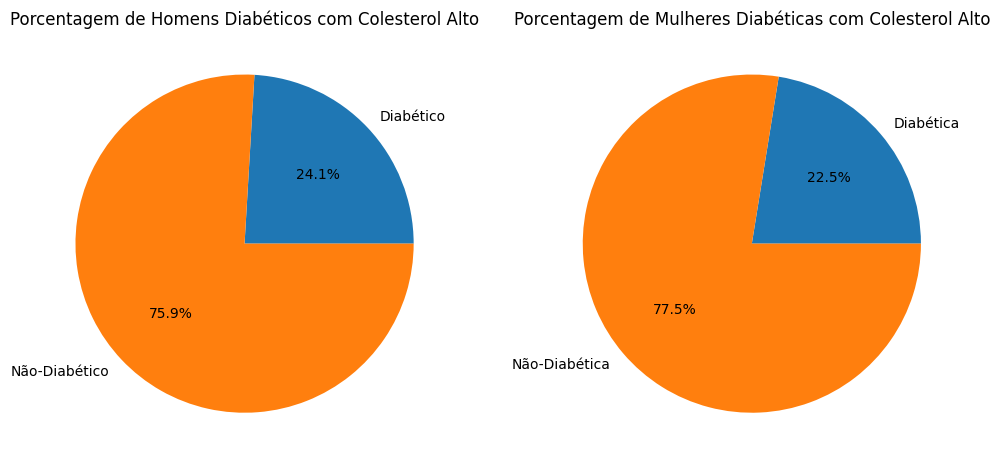

In [34]:
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabético', 'Não-Diabético'], autopct='%1.1f%%')
plt.title('Porcentagem de Homens Diabéticos com Colesterol Alto')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabética', 'Não-Diabética'], autopct='%1.1f%%')
plt.title('Porcentagem de Mulheres Diabéticas com Colesterol Alto')

plt.show()

### O impacto Percentual do Cigarro na Diabetes

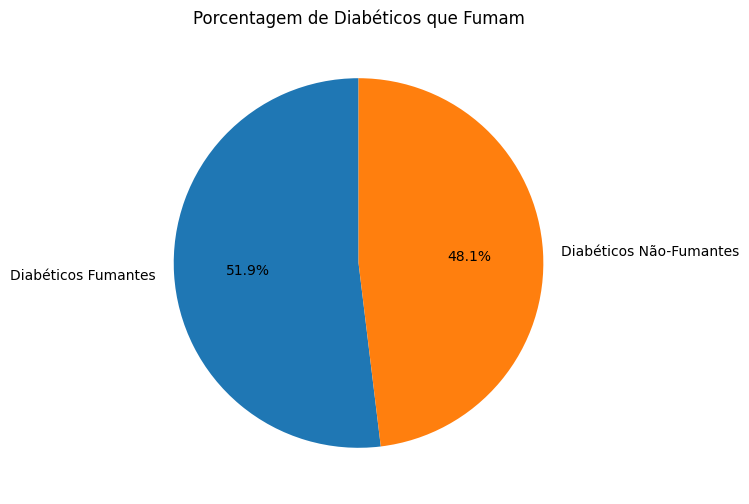

In [35]:
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Diabéticos Fumantes', 'Diabéticos Não-Fumantes']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Diabéticos que Fumam')
plt.show()